In [4]:
# -*- coding: utf-8 -*-

In [5]:
from IPython.display import Audio, Image, IFrame
from IPython.display import display
from IPython.display import display_pdf

# Speech pattern discovery and evaluation on the CallHome dataset

## Unsupervised Term Discovery

### Dynamic Time Warping algorithm for detecting repeated speech segments

Speech data is recorded as a time series of signal amplitude (continuous) values. Segmental DTW was proposed by Alex Park et al. as an effective method of extracting patterns from speech data. The repeated terms can be word, sub-word or compound-word like units. In order to use speech data for downstream applications such as: Machine Translation, Query-by-Example, among others, these discovered terms provide a psuedo discrete tokenisation of the continuous data. In this work, we use the Zero Resource Toolkit made available by Aren et al. The toolkit allows us to perform UTD in relativly quick time.

Consider the following two speech inputs:

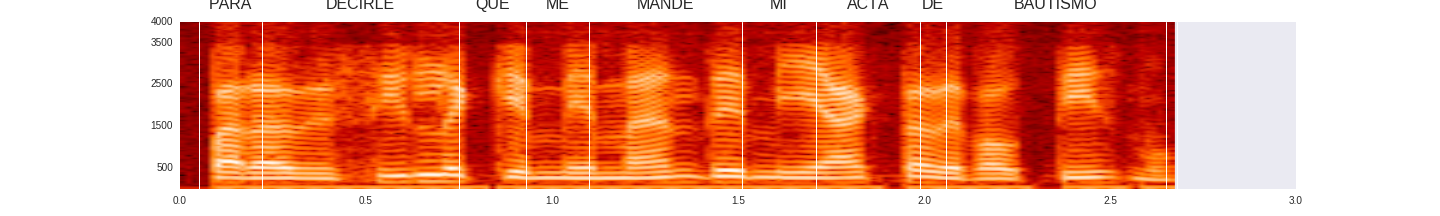

In [6]:
Image("output/bautismo_1761.png")

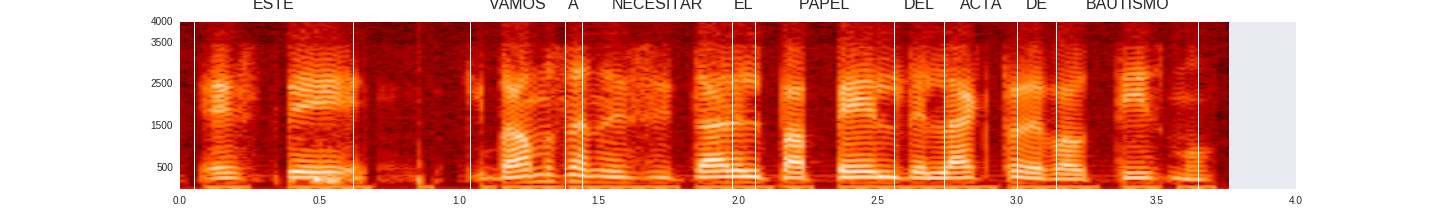

In [7]:
Image("output/bautismo_1762.png")

An acoustic dotplot computed over the MFCC representations of these utterances appears as follows

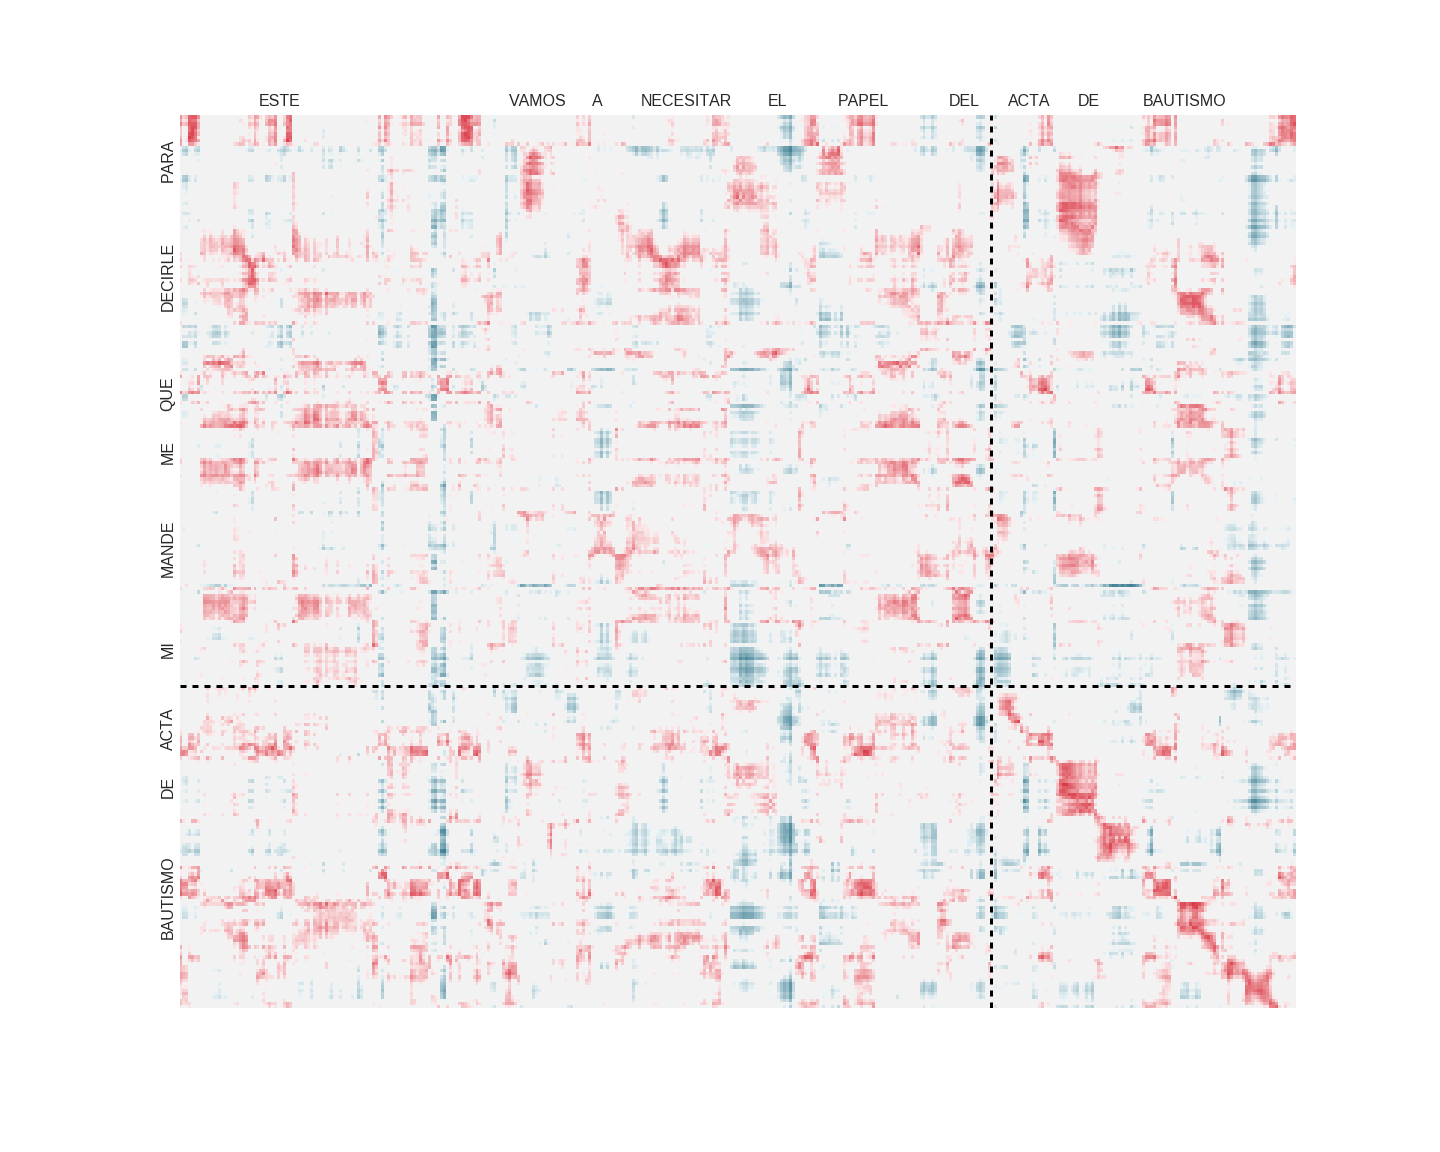

In [8]:
Image("output/dtw_pair_1761_1762.png")

Any diagonal line patterns in an acoustic dotplot signify a common acoustic segment. In this case, we know from the transcripts, that the words are "ACTA DE BAUTISMO". The Zero Resource Toolkit, employs image detection techniques to extract these acoustic segment matches and outputs them as pairs. 

### UTD output

The discovered speech patterns are provided along with the following information:
- Pair id
- Node id for speech segment 1, audio file, start and end times
- Node id for speech segment 2, audio file, start and end times
- A DTW score between 0 and 1.0. A high score indicates a stronger acoustic match

The following tables provide an excerpt of this information:


| Pair id | Node 1 | Node 2 | DTW score | ES content match |
|:-------:|:------:|:------:|:---------:|:----------------:|
|    0    |   1    |   2    |   0.882   |           0           |
|    1    |   2    |   64   |   0.903   |           0           |
|    2    |   3    |   4    |   0.872   |           0           |
|...|...|...|...|...|
|    26   |   27   |   28   |    0.86   |           1           |
|    50   |   61   |   62   |   0.88   |           1           |
|...|...|...|...|...|
|**5119**|**1761**|**1762**|**0.933**| 1 |
|...|...|...|...|...|


| Node id | Speech file | Start time(ms) | End time(ms) |
|:-------:|:-----------:|:-------------:|:-------------:|
|    1    | 049.003.wav |      356       |     411      |
|    2    | 049.007.wav |      371       |     434      |
|    3    | 049.003.wav |       53       |     105      |
|    4    | 049.007.wav |      758       |     811      |
|    27   | 049.003.wav |      572       |     623      |
|    28   | 060.030.wav |      226       |     277      |
|    61   | 049.007.wav |      144       |     201      |
|    62   | 049.073.wav |       20       |      75      |
|    64   | 049.073.wav |      263       |     321      |
|...|...|...|...|
|   1761  | 049.142.wav |      177       |     267      |
|   1762  | 049.152.wav |      279       |     372      |
|...|...|...|...|




### Experimental setup

We use CALLHOME Spanish corpus, which consists of speech from telephone conversations between native speakers. Using the SPRACHcore (#insert_ref#) software package, we generate 39-dimensional Relative Spectral Transform - Perceptual Linear Prediction (PLP) feature vectors. Each dimension is further mean and variance normalised.

For UTD experiment, we use speech from 20 telephone calls. We use a forced alignment of the speech input with transcriptions to generate a gold standard and also for determining the voice active regions. For all experiments, we assume that ground truth voice activity information is available. (#insert how to explain gold standard alignments#). To improve the output of the UTD system, we use the English translations provided as part of (#insert_ref#).

UTD systems are sensitive to silent and background speech regions .To eliminate these regions from the discovery process, we use the following two methods for Voice Activity Detection (VAD):
1. VAD information extracted from forced alignment with transcriptions
This has the advantage of retaining most of the active speech regions in the data. However, due to imperfect alignments, and stop words, some silent regions are left unfiltered. This leads to several spurious pairs being discovered by the Zero Resource Toolkit.

2. VAD information extracted using an energy detection script
The script performs aggressive filtering and removes a lot of voice activity regions in addition to silence and background noise. The VAD regions however lead to better pairs in the ZRT output.

| Type of active speech filtering | Duration of retained speech (hours) |
| -----------------------------: |:---------------------------:|
| Human labeled transcriptions | 3.34  |
| VAD using force alignment with transcriptions | 2.70 |
| VAD using energy detection | 0.91  |


### UTD output evaluation

We use the Spanish transcriptions to evaluate the UTD output. For each pair of segments which the ZRT outputs as an acoustic match, we retrieve the corresponding words from the transcripts. The retrieved words are then filtered for stop words. A discovered pair is assigned a score of 1, if the two segments have atleast one content word in common, otherwise, the score assigned is 0.


| Node id |        ES words        |    ES content words    |
|:-------:|:----------------------:|:----------------------:|
|    1    |    LíNEAS Y ESTABA     |         LíNEAS         |
|    2    |       QUE ESTáN        |          ---           |
|    3    |   MIRA ES QUE ESTOY    |          MIRA          |
|    4    | PUEDE DECIR SEXPERCIOS | PUEDE DECIR SEXPERCIOS |
|    27   |     TRABAJO TENGO      |        TRABAJO         |
|    28   |   TRABAJO QUE TENGA    |        TRABAJO         |
|    61   |       UNA COSA         |         COSA           |
|    62   |  OTRA COSA IMPORTANTE  |    COSA IMPORTANTE     |
|    64   |        EH  A LO        |          EH            |
|   1761  |   ACTA DE BAUTISMO     |     ACTA BAUTISMO      |
|   1762  |   ACTA DE BAUTISMO     |     ACTA BAUTISMO      |






#### Precision/Recall:

After scoring all the discovered pairs using the transcriptions, we calculate the Precision and Recall over the good pairs (with transcription score of 1) at various DTW score thresholds. As per the ZRT documentation, it is recommended to use pairs with a DTW score of 0.88 and a minimum duration of 500 ms.

#### Average Precision:

We also compute an Average Precision metric over the entire range of DTW scores computed over the speech data.

## Experiments

TODO (or not todo)

- Suffix array over transcripts to extract gold standard pattern?
- Alternately, extract words longer than 500 ms, and repeated atleast twice, in different utterance ids

Our goal is to quantitavely evaluate the discovered speech pairs. For an intrinsic evaluation, we use the force aligned transcriptions to compute an Average Precision over UTD output. To test extrinsically, we generate a UTD to English translation model and compute precision and recall metrics.

We also attempt to quantify the improvements in UTD output, which can be achieved using additional information, which in this case is English translations. The translations can be considered as a form of noisy label.

### Choosing UTD parameters

| DTW score        | Duration (ms) |  
| ------------- |:-------------:|
| 0.80     | 500 |



### UTD output

<table>
    <tr>
        <th>Description</th>
        <th># of pairs</th>
    </tr>
    <tr>
        <td>Total pairs</td>
        <td>2173</td>
    </tr>
    <tr>
        <td>With sil, sp, or no matches</td>
        <td>78</td>
    </tr>
    <tr>
        <td>Pairs with speech segments and ES words</td>
        <td>2095</td>
    </tr>
</table>

Example, where acoustic similarity is high, but translation is low:
34	45	46	0.908	DIFíCILES POR EJEMPLO	FILóCTETES POR EJEMPLO P	1	0.857	1	0.092	0.826	1.049.007	1.049.014

## Improving UTD with noisy labels - English translations